### 1. Setup and Initial Data Loading

This section imports necessary libraries and loads the raw data from `claimdata.txt` into a pandas DataFrame. It also performs an initial inspection of the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

df = pd.read_csv("../data/raw/claimdata.txt", sep='|')
df.head()

In [ ]:
df.columns

In [9]:
df.shape

(1000098, 52)

In [16]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [17]:
df.isnull().sum().sort_values(ascending=False)

cubiccapacity               552
kilowatts                   552
bodytype                    552
NumberOfDoors               552
mmcode                      552
VehicleIntroDate            552
Model                       552
Cylinders                   552
make                        552
CapitalOutstanding            2
TransactionMonth              0
IsVATRegistered               0
UnderwrittenCoverID           0
PolicyID                      0
Province                      0
Country                       0
Gender                        0
MaritalStatus                 0
AccountType                   0
Bank                          0
Language                      0
Title                         0
LegalType                     0
Citizenship                   0
RegistrationYear              0
VehicleType                   0
MainCrestaZone                0
PostalCode                    0
SubCrestaZone                 0
ItemType                      0
AlarmImmobiliser              0
Tracking

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# 1️⃣ Drop columns with too many missing values
columns_to_drop = [
    'NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate',
    'Rebuilt', 'Converted', 'WrittenOff'
]
df = df.drop(columns=columns_to_drop)

# 2️⃣ Fill missing categorical values
categorical_cols = [
    'NewVehicle', 'Bank', 'AccountType', 'Gender', 'MaritalStatus',
    'VehicleType', 'make', 'mmcode', 'Model', 'bodytype', 'Cylinders',
    'NumberOfDoors', 'VehicleIntroDate', 'cubiccapacity'
]

for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# 3️⃣ Fill missing numerical values
numerical_cols = ['CapitalOutstanding']  # Almost complete, just fill 2 missing
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 4️⃣ Verify cleaning
print(df.isnull().sum().sort_values(ascending=False))


# Histogram for TotalPremium

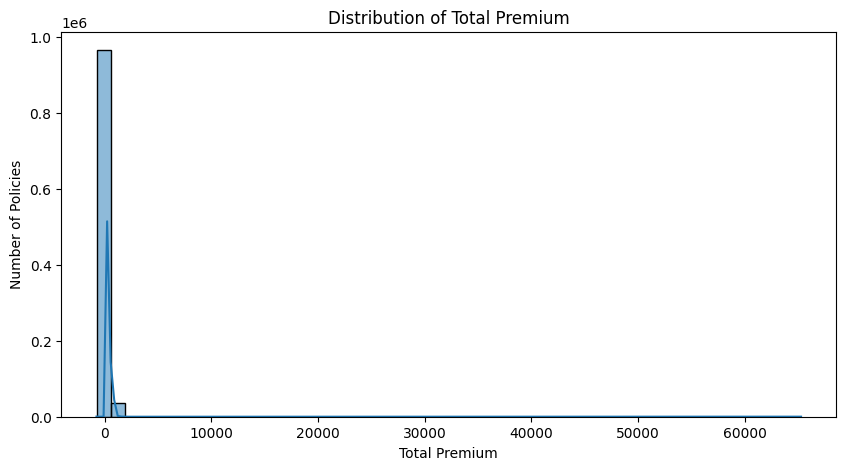

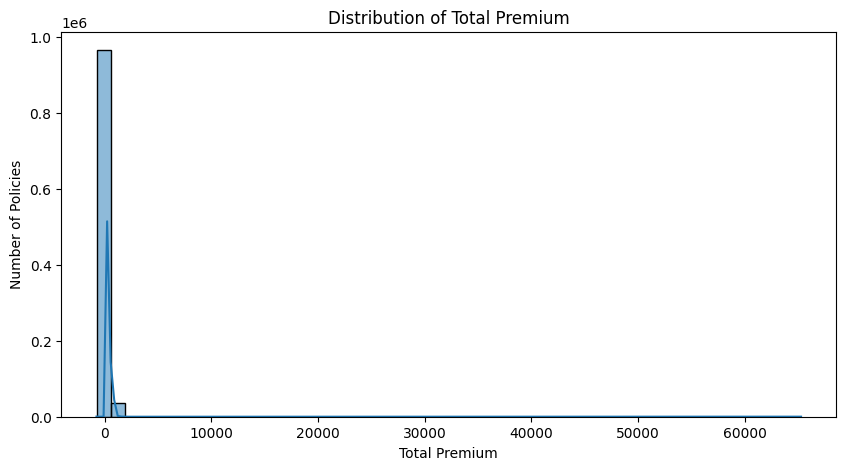

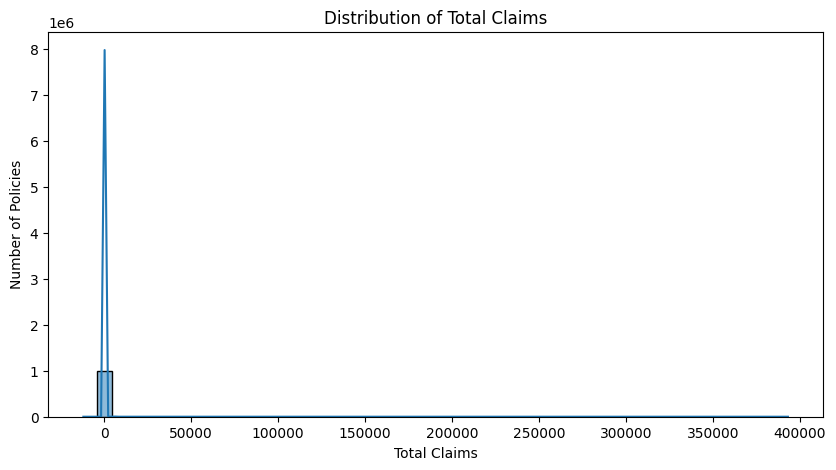

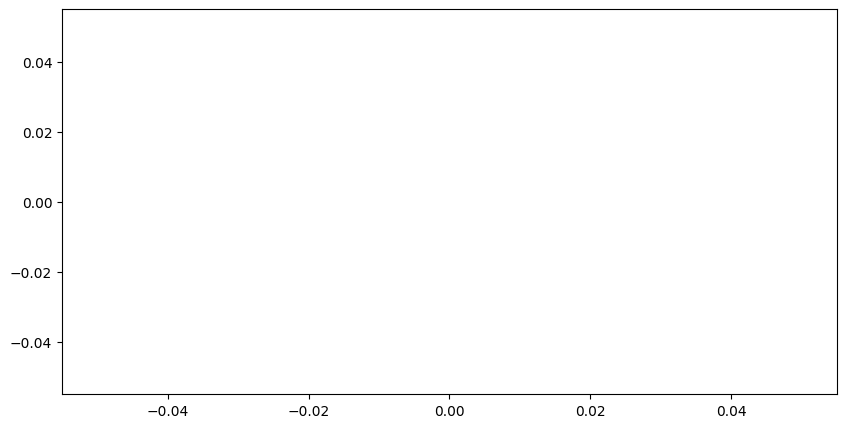

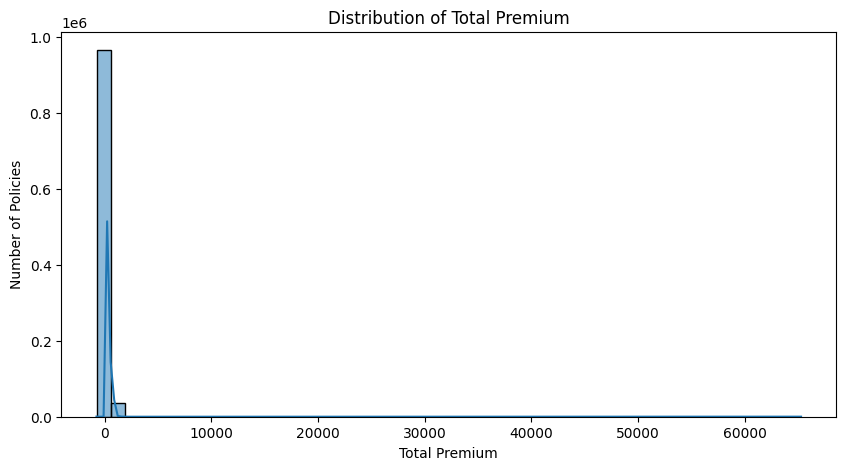

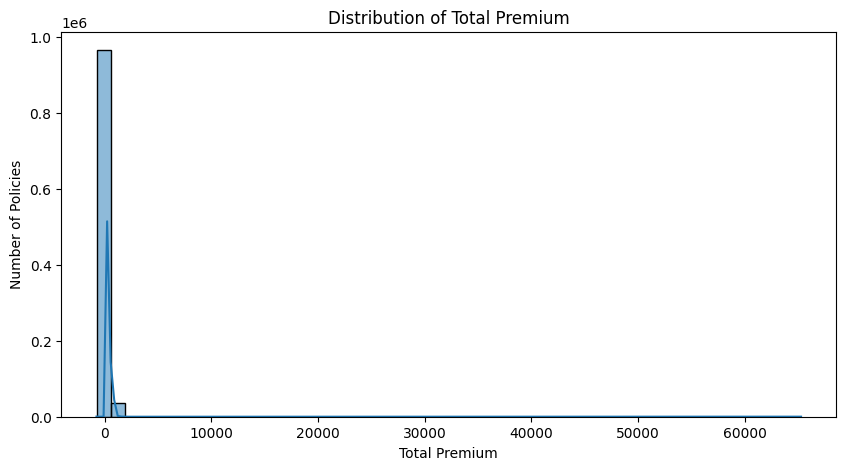

In [23]:
# Histogram for TotalPremium
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Number of Policies')
plt.show()

# Histogram for TotalClaims

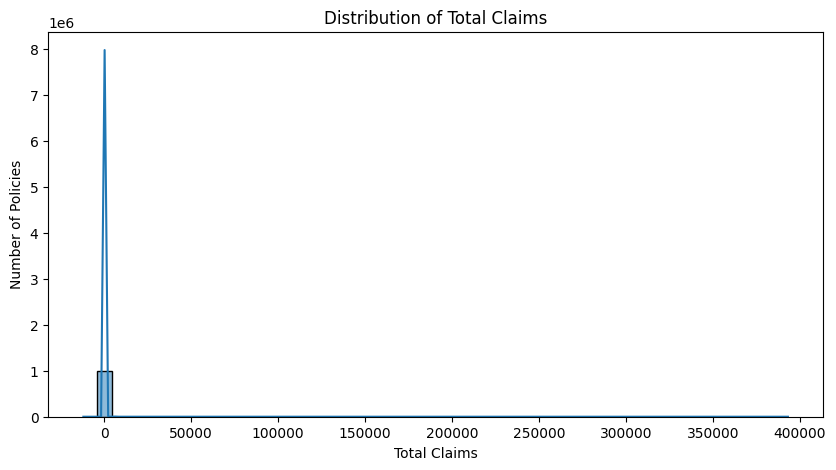

In [24]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Number of Policies')
plt.show()

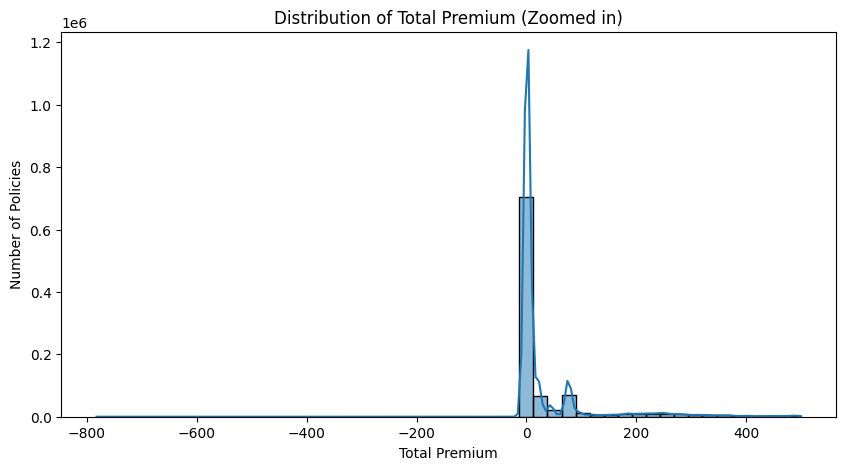

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['TotalPremium'] < 500]['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of Total Premium (Zoomed in)')
plt.xlabel('Total Premium')
plt.ylabel('Number of Policies')
plt.show()


# Histogram for TotalClaims

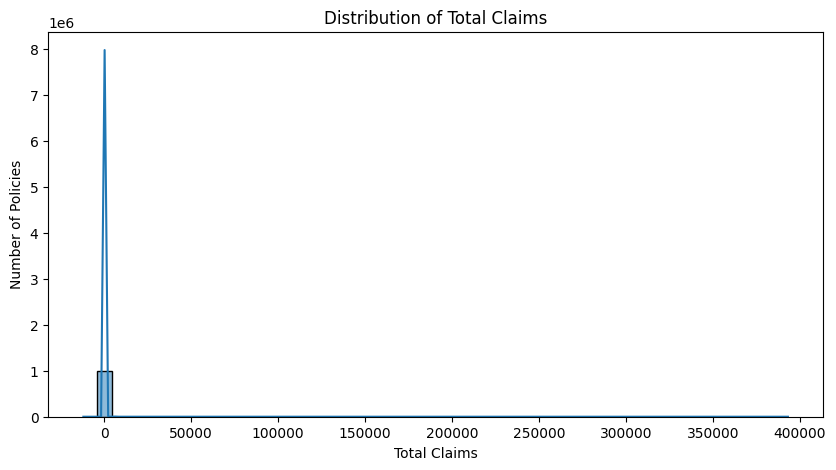

In [28]:
# Histogram for TotalClaims
plt.figure(figsize=(10,5))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Number of Policies')
plt.show()


# Create a new column for Loss Ratio

In [30]:
# Create a new column for Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Check first 5 rows
df[['TotalPremium', 'TotalClaims', 'LossRatio']].head()


,TotalPremium,TotalClaims,LossRatio
0,21.929825,0.0,0.0
1,21.929825,0.0,0.0
2,0.000000,0.0,NaN
3,512.848070,0.0,0.0
4,0.000000,0.0,NaN


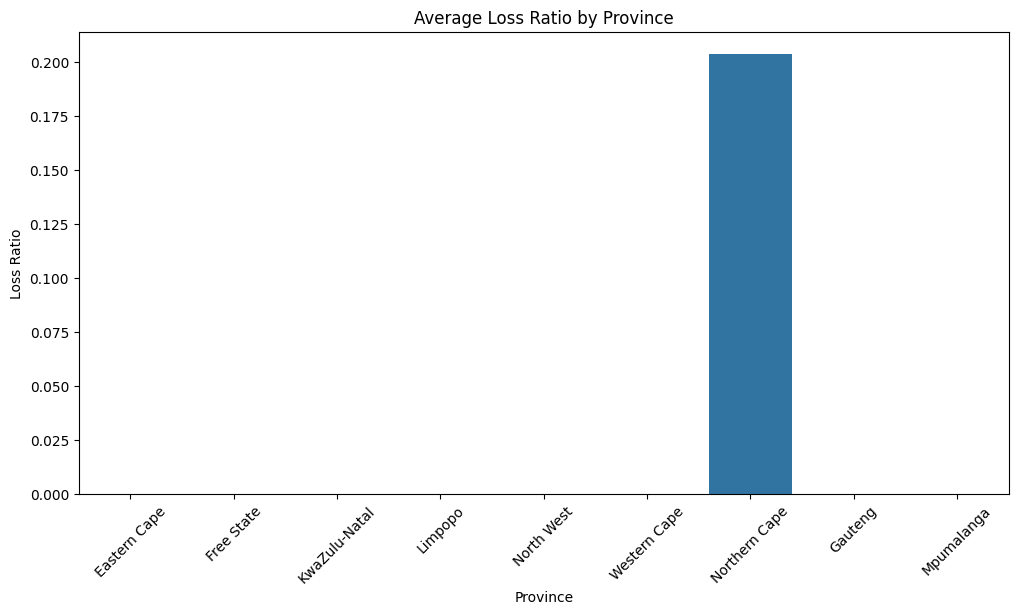

In [31]:
# Average Loss Ratio per Province
province_loss = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=province_loss.index, y=province_loss.values)
plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.show()


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_14988\2651204834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_loss.index, y=province_loss.values, palette='viridis')


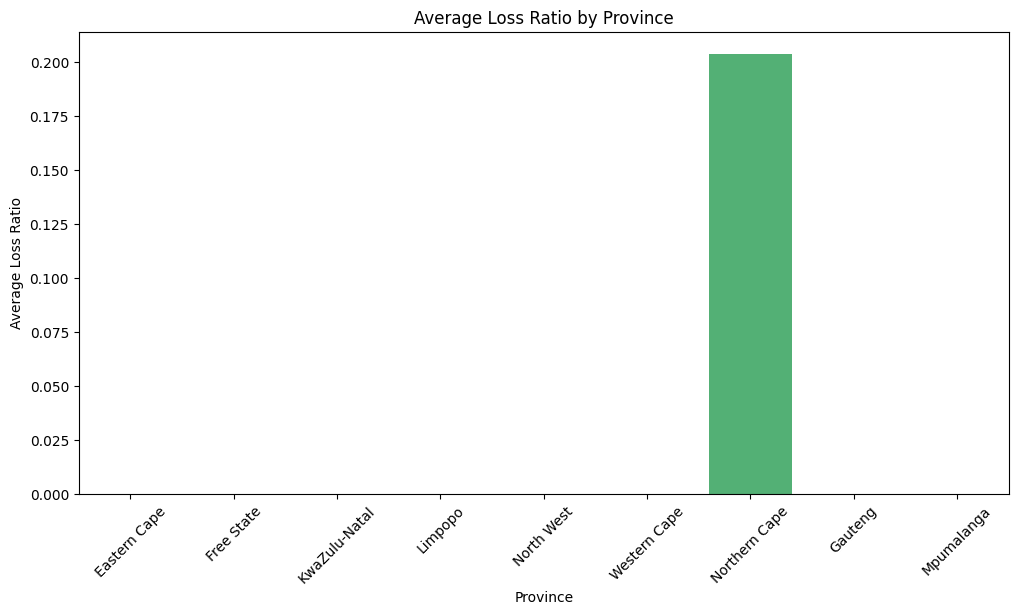

In [32]:
# Calculate average Loss Ratio per Province
province_loss = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=province_loss.index, y=province_loss.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Province')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Province')
plt.show()


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_14988\734395962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_loss.index, y=vehicle_loss.values, palette='magma')


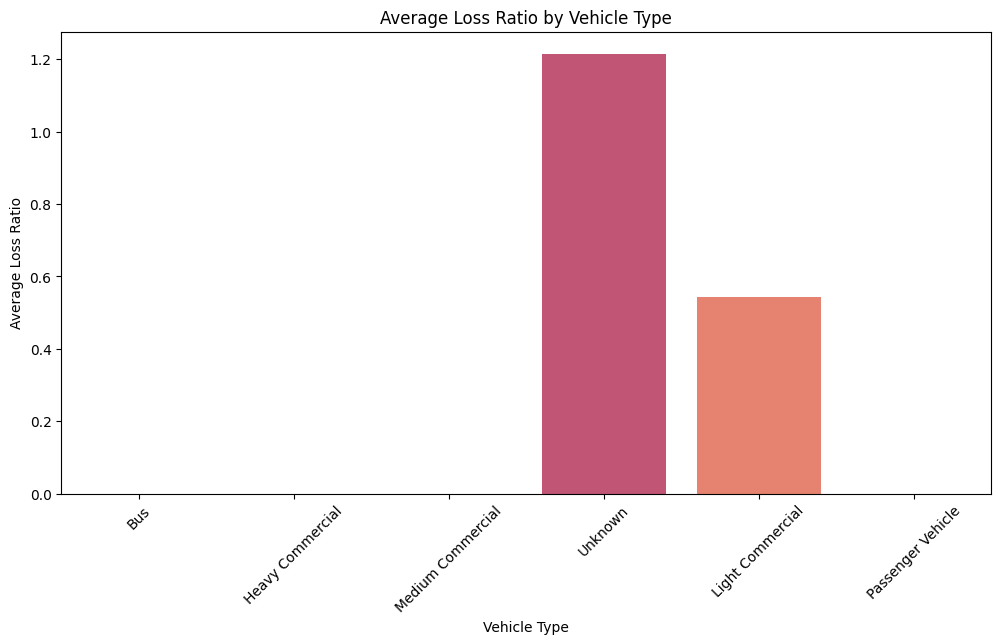

In [33]:
# Calculate average Loss Ratio per VehicleType
vehicle_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=vehicle_loss.index, y=vehicle_loss.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Vehicle Type')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Vehicle Type')
plt.show()


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_14988\1350363215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_loss.index, y=gender_loss.values, palette='coolwarm')


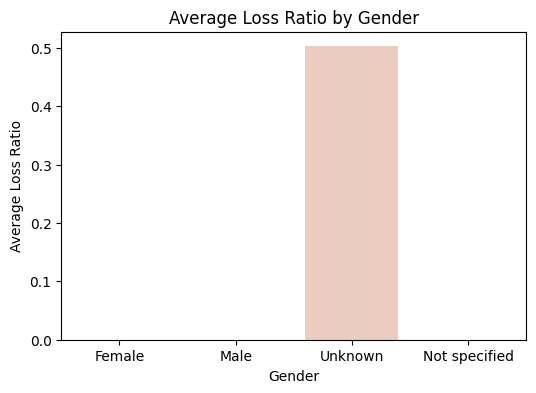

In [34]:
# Calculate average Loss Ratio per Gender
gender_loss = df.groupby('Gender')['LossRatio'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_loss.index, y=gender_loss.values, palette='coolwarm')
plt.title('Average Loss Ratio by Gender')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Gender')
plt.show()
